<a href="https://colab.research.google.com/github/shazm12/Spotify-Song-Recommendation-Engine-hashnode-blog-proj/blob/main/Spotify_Playlist_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 140 kB 11.3 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 236 kB 48.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import json
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd 
import spotipy
import numpy as np


username = 'DJSHZM '
clientID = 'a89999781b4f476fafa153f78011a021'
clientSecret = '4513cd8f632143cda0630a3da3cba7b1'
scope = "user-library-read user-follow-read user-top-read playlist-read-private" 
client_credentials_manager = SpotifyClientCredentials(clientID, clientSecret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)



In [ ]:
playlist_link = "https://open.spotify.com/playlist/79z9i0bjEBetmjtDAg2r7B"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
results = sp.playlist(playlist_URI)


In [ ]:
# create a list of song ids
ids=[]

for item in results['tracks']['items']:
        track = item['track']['id']
        ids.append(track)
        
song_meta={'id':[],'album':[], 'name':[], 
           'artist':[],'explicit':[],'popularity':[],
           'release_date':[] }

for song_id in ids:
    # get song's meta data
    meta = sp.track(song_id)
    # song id
    song_meta['id'].append(song_id)

    # album name
    album=meta['album']['name']
    song_meta['album']+=[album]

    # song name
    song=meta['name']
    song_meta['name']+=[song]
    
    # artists name
    s = ','
    artist=s.join([singer_name['name'] for singer_name in meta['artists']])
    song_meta['artist']+=[artist]
    
    # explicit: lyrics could be considered offensive or unsuitable for children
    explicit=meta['explicit']
    song_meta['explicit'].append(explicit)
    
    # song popularity
    popularity=meta['popularity']
    song_meta['popularity'].append(popularity)

    #song release data
    release = meta['album']['release_date']
    song_meta['release_date'].append(release)
    




song_meta_df=pd.DataFrame.from_dict(song_meta)

# check the song feature
features = sp.audio_features(song_meta['id'])
# change dictionary to dataframe
features_df=pd.DataFrame.from_dict(features)

# convert milliseconds to mins
# duration_ms: The duration of the track in milliseconds.
# 1 minute = 60 seconds = 60 × 1000 milliseconds = 60,000 ms
features_df['duration_ms']=features_df['duration_ms']/60000

# combine two dataframe
final_df=song_meta_df.merge(features_df)

In [ ]:
top_playlist_link = "https://open.spotify.com/playlist/37i9dQZEVXbMDoHDwVN2tF"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
results_1 = sp.playlist(top_playlist_link)

In [ ]:
# create a list of song ids
ids=[]

for item in results_1['tracks']['items']:
        track = item['track']['id']
        ids.append(track)
        
song_meta={'id':[],'album':[], 'name':[], 
           'artist':[],'explicit':[],'popularity':[],
           'release_date':[] }

for song_id in ids:
    # get song's meta data
    meta = sp.track(song_id)
    print(meta)
    # song id
    song_meta['id'].append(song_id)

    # album name
    album=meta['album']['name']
    song_meta['album']+=[album]

    # song name
    song=meta['name']
    song_meta['name']+=[song]
    
    # artists name
    s = ','
    artist=s.join([singer_name['name'] for singer_name in meta['artists']])
    song_meta['artist']+=[artist]
    
    # explicit: lyrics could be considered offensive or unsuitable for children
    explicit=meta['explicit']
    song_meta['explicit'].append(explicit)
    
    # song popularity
    popularity=meta['popularity']
    song_meta['popularity'].append(popularity)

    #song release data
    release = meta['album']['release_date']
    song_meta['release_date'].append(release)
    




song_meta_df=pd.DataFrame.from_dict(song_meta)

# check the song feature
features = sp.audio_features(song_meta['id'])
# change dictionary to dataframe
features_df=pd.DataFrame.from_dict(features)

# convert milliseconds to mins
# duration_ms: The duration of the track in milliseconds.
# 1 minute = 60 seconds = 60 × 1000 milliseconds = 60,000 ms
features_df['duration_ms']=features_df['duration_ms']/60000

# combine two dataframe
top_final_df=song_meta_df.merge(features_df)

{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7tYKF4w9nC0nq9CsPZTHyP'}, 'href': 'https://api.spotify.com/v1/artists/7tYKF4w9nC0nq9CsPZTHyP', 'id': '7tYKF4w9nC0nq9CsPZTHyP', 'name': 'SZA', 'type': 'artist', 'uri': 'spotify:artist:7tYKF4w9nC0nq9CsPZTHyP'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI', 'KM', 'KN', 'KR', 'KW', 'KZ', 'LA', 'LB', 'LC', 'LI', 'LK', 'LR', 'LS', 'LT', 'LU', 'LV', 'LY', 'MA', 'MC', 'MD', 'ME', 'MG', 'MH', 'MK', 'ML', 'MN', 'MO',

In [ ]:
final_df.head()

,id,album,name,artist,explicit,popularity,release_date,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,64I9byMYBlS1ARsC3vtpgW,"Not Waving, But Drowning",Ottolenghi,"Loyle Carner,Jordan Rakei",False,63,2019-04-19,0.776,0.593,7,...,0.006160,0.186,0.247,94.970,audio_features,spotify:track:64I9byMYBlS1ARsC3vtpgW,https://api.spotify.com/v1/tracks/64I9byMYBlS1...,https://api.spotify.com/v1/audio-analysis/64I9...,3.293350,4
1,51rPRW8NjxZoWPPjnRGzHw,Lady Lady,Tadow,"Masego,FKJ",False,73,2018-09-07,0.704,0.487,9,...,0.000086,0.111,0.313,121.726,audio_features,spotify:track:51rPRW8NjxZoWPPjnRGzHw,https://api.spotify.com/v1/tracks/51rPRW8NjxZo...,https://api.spotify.com/v1/audio-analysis/51rP...,5.031550,4
2,6zWU7YALeEDMcPGhKKZJhV,Navajo,Navajo,Masego,False,67,2017-06-08,0.567,0.593,6,...,0.000001,0.248,0.358,88.545,audio_features,spotify:track:6zWU7YALeEDMcPGhKKZJhV,https://api.spotify.com/v1/tracks/6zWU7YALeEDM...,https://api.spotify.com/v1/audio-analysis/6zWU...,3.235950,4
3,3xy8karhdpkltgdwj9FGbQ,Stay Lost (Cabu Remix),Stay Lost - Cabu Remix,"Joe Hertz,Amber-Simone,Cabu",False,26,2016-04-11,0.572,0.498,2,...,0.000005,0.247,0.549,109.192,audio_features,spotify:track:3xy8karhdpkltgdwj9FGbQ,https://api.spotify.com/v1/tracks/3xy8karhdpkl...,https://api.spotify.com/v1/audio-analysis/3xy8...,3.781817,4
4,79ZQoLroAAQYHM9sJ1kbGh,Keeping Me Under,Keeping Me Under,Two Another,False,62,2016-02-11,0.794,0.549,2,...,0.000108,0.115,0.580,108.015,audio_features,spotify:track:79ZQoLroAAQYHM9sJ1kbGh,https://api.spotify.com/v1/tracks/79ZQoLroAAQY...,https://api.spotify.com/v1/audio-analysis/79ZQ...,3.648767,4


In [ ]:
top_final_df.head()

,id,album,name,artist,explicit,popularity,release_date,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,1Qrg8KqiBpW07V7PNxwwwL,SOS,Kill Bill,SZA,False,86,2022-12-08,0.644,0.735,8,...,0.144000,0.1610,0.418,88.980,audio_features,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,2.565783,4
1,0bYg9bo50gSsH3LtXe2SQn,Merry Christmas,All I Want for Christmas Is You,Mariah Carey,False,100,1994-10-28,0.336,0.627,7,...,0.000000,0.0708,0.350,150.273,audio_features,spotify:track:0bYg9bo50gSsH3LtXe2SQn,https://api.spotify.com/v1/tracks/0bYg9bo50gSs...,https://api.spotify.com/v1/audio-analysis/0bYg...,4.018450,4
2,2FRnf9qhLbvw8fu4IBXx78,LAST CHRISTMAS,Last Christmas,Wham!,False,97,1984-11-29,0.735,0.478,2,...,0.000002,0.3550,0.947,107.682,audio_features,spotify:track:2FRnf9qhLbvw8fu4IBXx78,https://api.spotify.com/v1/tracks/2FRnf9qhLbvw...,https://api.spotify.com/v1/audio-analysis/2FRn...,4.382667,4
3,3nqQXoyQOWXiESFLlDF1hG,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),"Sam Smith,Kim Petras",False,98,2022-09-22,0.714,0.472,2,...,0.000005,0.2660,0.238,131.121,audio_features,spotify:track:3nqQXoyQOWXiESFLlDF1hG,https://api.spotify.com/v1/tracks/3nqQXoyQOWXi...,https://api.spotify.com/v1/audio-analysis/3nqQ...,2.615717,4
4,2dHHgzDwk4BJdRwy9uXhTO,HEROES & VILLAINS,Creepin' (with The Weeknd & 21 Savage),"Metro Boomin,The Weeknd,21 Savage",True,93,2022-12-02,0.715,0.620,1,...,0.000000,0.0822,0.172,97.950,audio_features,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,https://api.spotify.com/v1/tracks/2dHHgzDwk4BJ...,https://api.spotify.com/v1/audio-analysis/2dHH...,3.692000,4


In [ ]:
final_df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.870000,0.632040,0.595848,5.410000,-7.982320,0.680000,0.122207,0.285012,0.064468,0.198505,0.500900,118.038940,3.515261,3.990000
std,25.414803,0.148145,0.182773,3.811453,2.946117,0.468826,0.107700,0.278250,0.201582,0.152423,0.242114,32.408877,0.990992,0.333182
min,0.000000,0.223000,0.084800,0.000000,-22.262000,0.000000,0.028800,0.000042,0.000000,0.028600,0.051600,69.930000,1.604000,1.000000
25%,40.750000,0.558250,0.500250,1.000000,-9.342250,0.000000,0.043525,0.045900,0.000000,0.101750,0.312250,90.806000,2.919271,4.000000
50%,61.000000,0.638500,0.606500,6.000000,-7.451000,1.000000,0.067050,0.177500,0.000028,0.124500,0.517000,110.822000,3.386350,4.000000
75%,71.000000,0.737000,0.740250,9.000000,-5.927000,1.000000,0.170000,0.432500,0.001850,0.250500,0.692500,140.061000,3.906279,4.000000
max,84.000000,0.981000,0.959000,11.000000,-3.805000,1.000000,0.567000,0.925000,0.936000,0.847000,0.947000,210.164000,7.708350,5.000000


In [ ]:
top_final_df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.00000,50.000000,50.000000,50.00000
mean,90.140000,0.631620,0.602320,4.780000,-7.235380,0.640000,0.077422,0.307529,2.122243e-02,0.203172,0.48718,122.413100,3.281742,3.86000
std,6.427016,0.160408,0.156316,3.339864,2.622733,0.484873,0.079274,0.291353,9.849012e-02,0.141662,0.24575,29.978608,0.700601,0.35051
min,66.000000,0.234000,0.223000,0.000000,-14.520000,0.000000,0.025400,0.001300,0.000000e+00,0.054600,0.13900,67.196000,1.952450,3.00000
25%,87.000000,0.531250,0.498500,2.000000,-8.699250,0.000000,0.034500,0.067625,2.950000e-07,0.097850,0.27300,97.963000,2.770933,4.00000
50%,92.000000,0.629000,0.621500,4.000000,-6.605500,1.000000,0.044550,0.166500,2.465000e-06,0.144000,0.42450,124.516500,3.297817,4.00000
75%,94.000000,0.734500,0.714250,7.000000,-5.375750,1.000000,0.077900,0.521250,2.007750e-04,0.297750,0.69650,143.740750,3.958421,4.00000
max,100.000000,0.914000,0.965000,11.000000,-2.810000,1.000000,0.383000,0.912000,6.700000e-01,0.718000,0.96700,201.739000,4.539550,4.00000


In [ ]:
colab_num_des_df = final_df[['id','danceability','loudness','energy','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']]
colab_top_num_des_df = top_final_df[['id','danceability','loudness','energy','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']]
num_des_df = final_df[['danceability','loudness','energy','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']]
top_num_des_df = top_final_df[['danceability','loudness','energy','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']]

In [ ]:
print(final_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                100 non-null    object 
 1   album             100 non-null    object 
 2   name              100 non-null    object 
 3   artist            100 non-null    object 
 4   explicit          100 non-null    bool   
 5   popularity        100 non-null    int64  
 6   release_date      100 non-null    object 
 7   danceability      100 non-null    float64
 8   energy            100 non-null    float64
 9   key               100 non-null    int64  
 10  loudness          100 non-null    float64
 11  mode              100 non-null    int64  
 12  speechiness       100 non-null    float64
 13  acousticness      100 non-null    float64
 14  instrumentalness  100 non-null    float64
 15  liveness          100 non-null    float64
 16  valence           100 non-null    float64
 17

In [ ]:
print(num_des_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      100 non-null    float64
 1   loudness          100 non-null    float64
 2   energy            100 non-null    float64
 3   speechiness       100 non-null    float64
 4   acousticness      100 non-null    float64
 5   instrumentalness  100 non-null    float64
 6   liveness          100 non-null    float64
 7   valence           100 non-null    float64
 8   tempo             100 non-null    float64
 9   duration_ms       100 non-null    float64
dtypes: float64(10)
memory usage: 8.6 KB
None


In [ ]:
#Data Normalization using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
num_des_df.loc[:]=min_max_scaler.fit_transform(num_des_df.loc[:])

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
#Data Normalization using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
top_num_des_df.loc[:]=min_max_scaler.fit_transform(top_num_des_df.loc[:])

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


# **My Personal Taste**

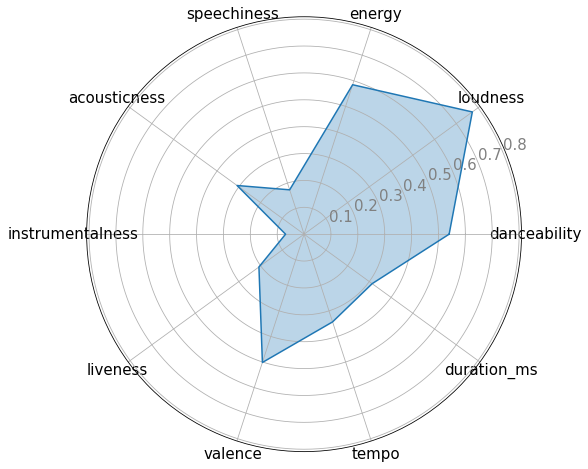

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot size
fig=plt.figure(figsize=(12,8))
pi=3.14159265359
# convert column names into a list
categories=list(num_des_df.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(num_des_df.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)

# plt.title('Discovery Weekly Songs Audio Features', size=35)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.show()

# **Trending features in Music According To Top 50 Playlist**

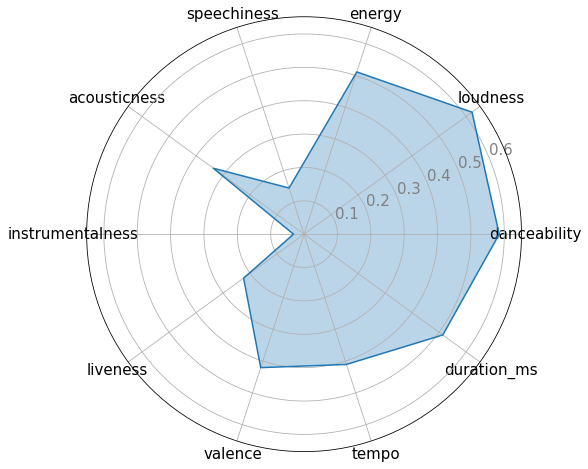

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot size
fig=plt.figure(figsize=(12,8))
pi=3.14159265359
# convert column names into a list
categories=list(top_num_des_df.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(top_num_des_df.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)

# plt.title('Discovery Weekly Songs Audio Features', size=35)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.show()

# Histogram of my Playlist Track's Features

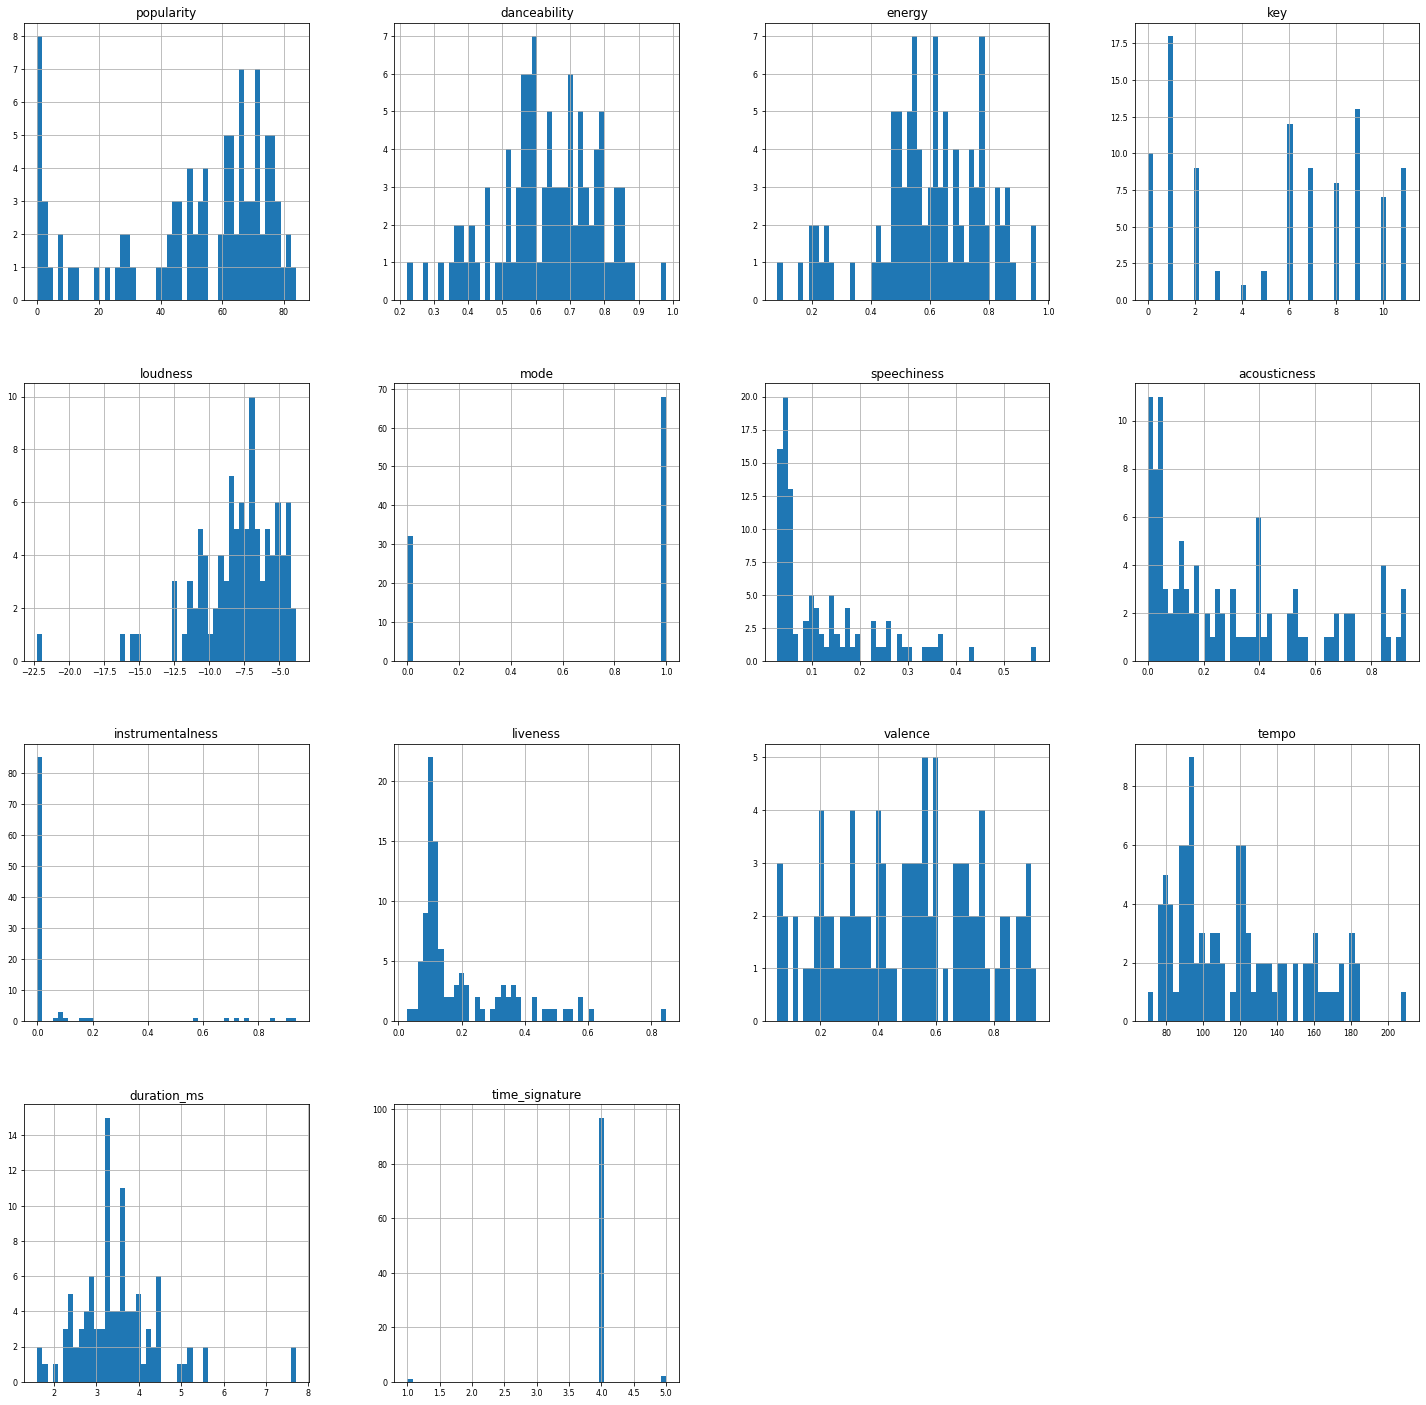

In [ ]:
final_df.hist(figsize=(25, 25), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

# Histogram of Top 50 Global Playlist's tracks features

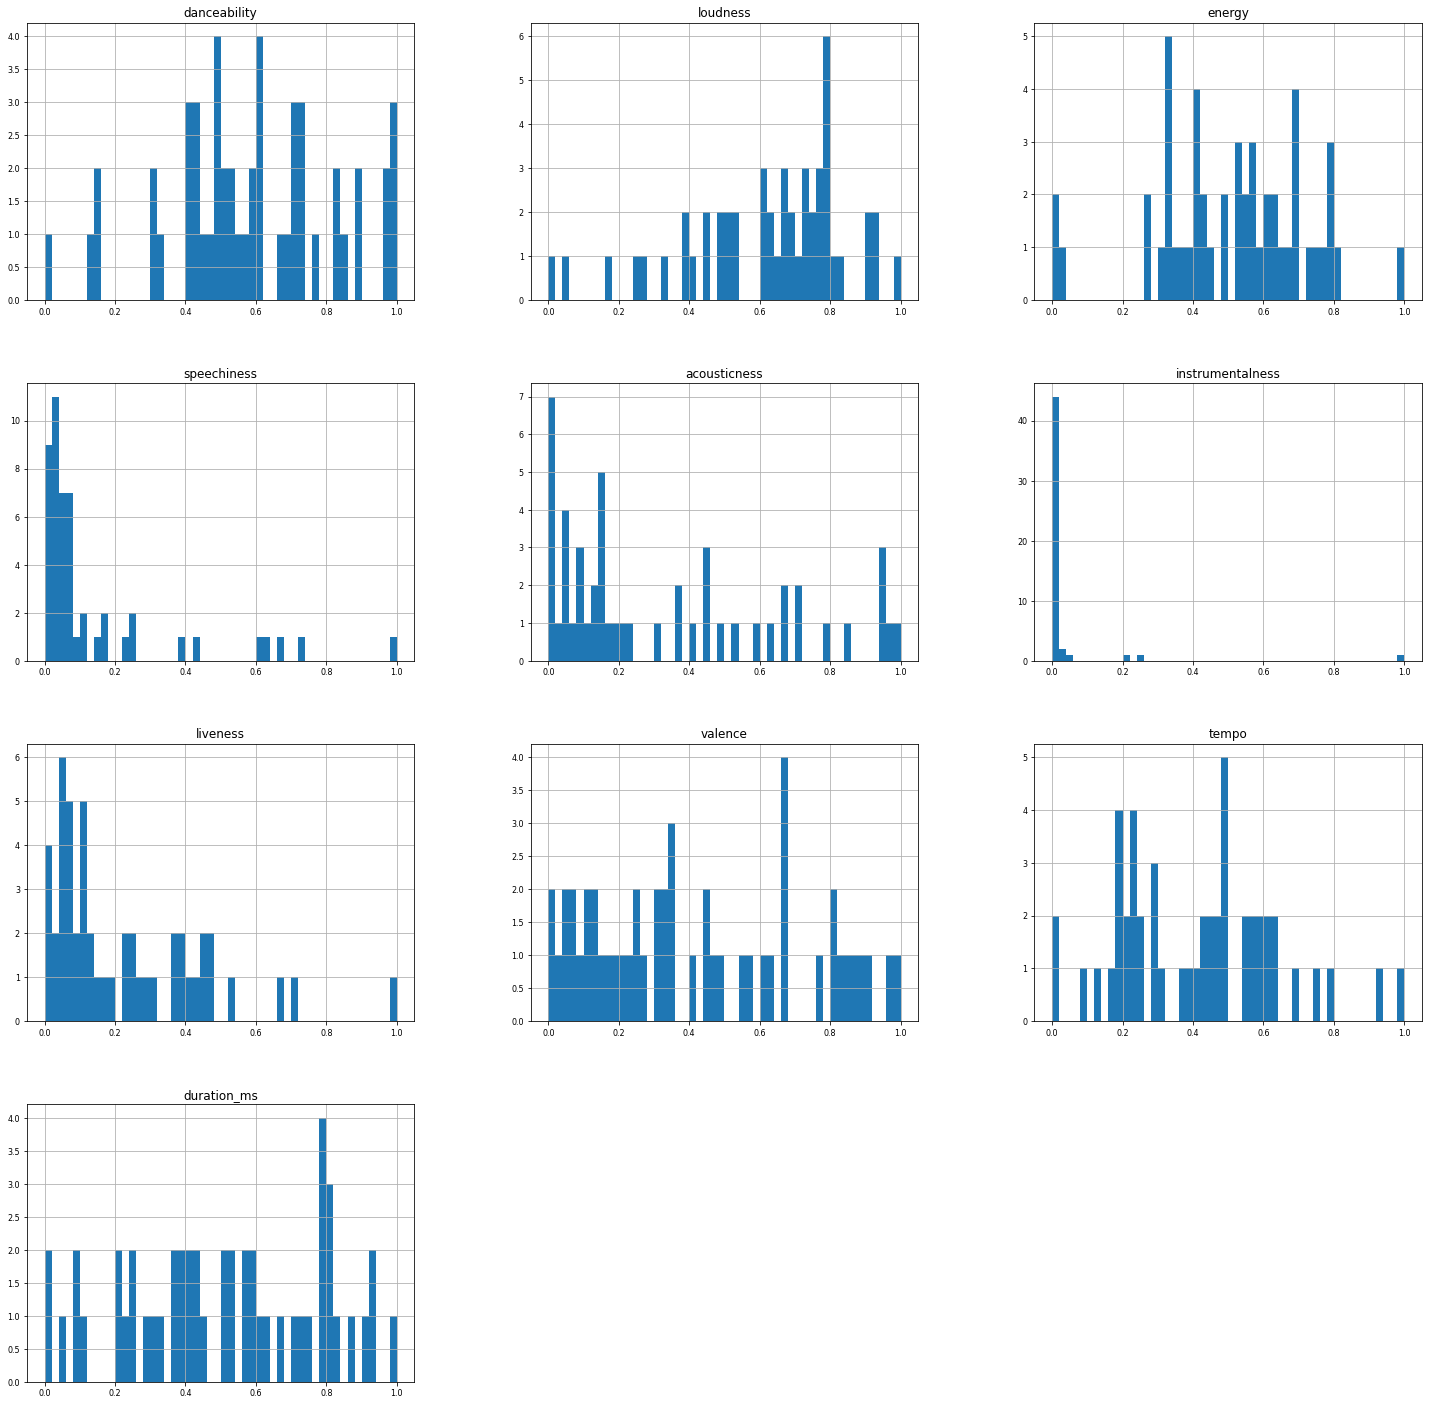

In [ ]:
top_num_des_df.hist(figsize=(25, 25), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

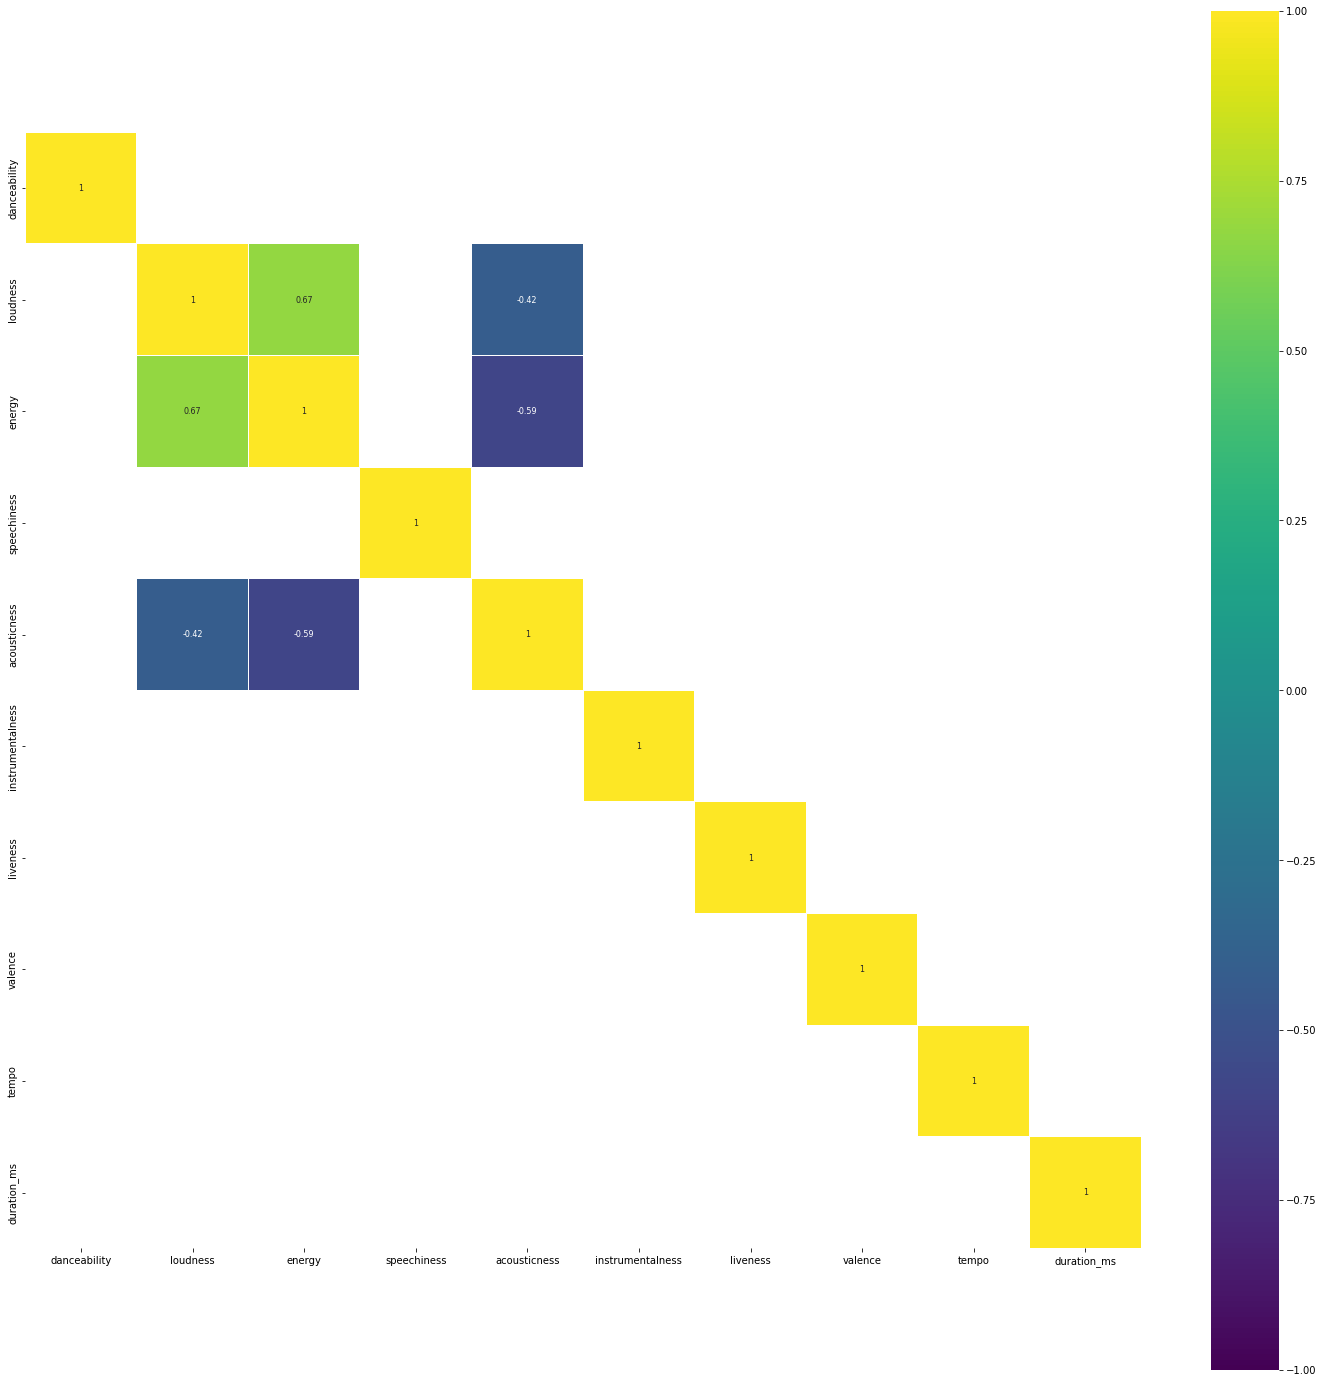

In [ ]:
corr = num_des_df.corr() # We already examined Avg Vote correlations
plt.figure(figsize=(25, 25))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

# **My Top Artist from the Playlist**

In [ ]:
artists_data = final_df["artist"].value_counts().head(10)
count_artist = artists_data.index
albums_data = final_df["album"].value_counts().head(10)
count_albums = albums_data.index
# here i am thinking to recommend based on the artist and album this playist has and hence checking which is the most heard artist and album here

([<matplotlib.axis.XTick at 0x7f649f3d8640>,
 [Text(0, 0, 'Jaden'),
  Text(0, 0, 'The Weeknd'),
  Text(0, 0, 'Rex Orange County'),
  Text(0, 0, 'Jeremy Zucker'),
  Text(0, 0, 'Cuco'),
  Text(0, 0, 'FKJ,((( O )))'),
  Text(0, 0, 'Drake'),
  Text(0, 0, 'Kanye West'),
  Text(0, 0, 'Mac Miller'),
  Text(0, 0, 'Jeremy Zucker,Chelsea Cutler')])

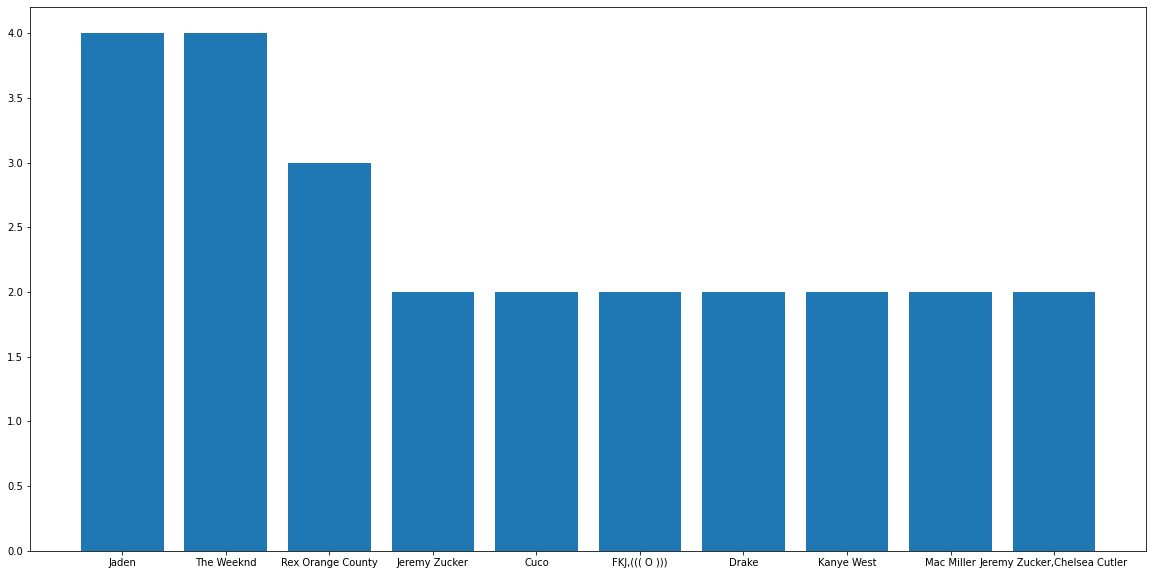

In [ ]:
postionofbars = list(range(len(count_artist)))
plt.figure(figsize=(20, 10))
plt.bar(postionofbars,artists_data)
plt.xticks(postionofbars,count_artist)

([<matplotlib.axis.XTick at 0x7f5cb54b8fa0>,
 [Text(0, 0, 'Dawn FM'),
  Text(0, 0, 'Caress Your Soul'),
  Text(0, 0, 'The Off-Season'),
  Text(0, 0, "CTV3: Day Tripper's Edition"),
  Text(0, 0, 'French Kiwi Juice'),
  Text(0, 0, 'Certified Lover Boy'),
  Text(0, 0, 'Donda'),
  Text(0, 0, 'Storyteller'),
  Text(0, 0, 'How Can You Mend A Broken Heart'),
  Text(0, 0, 'Buds')])

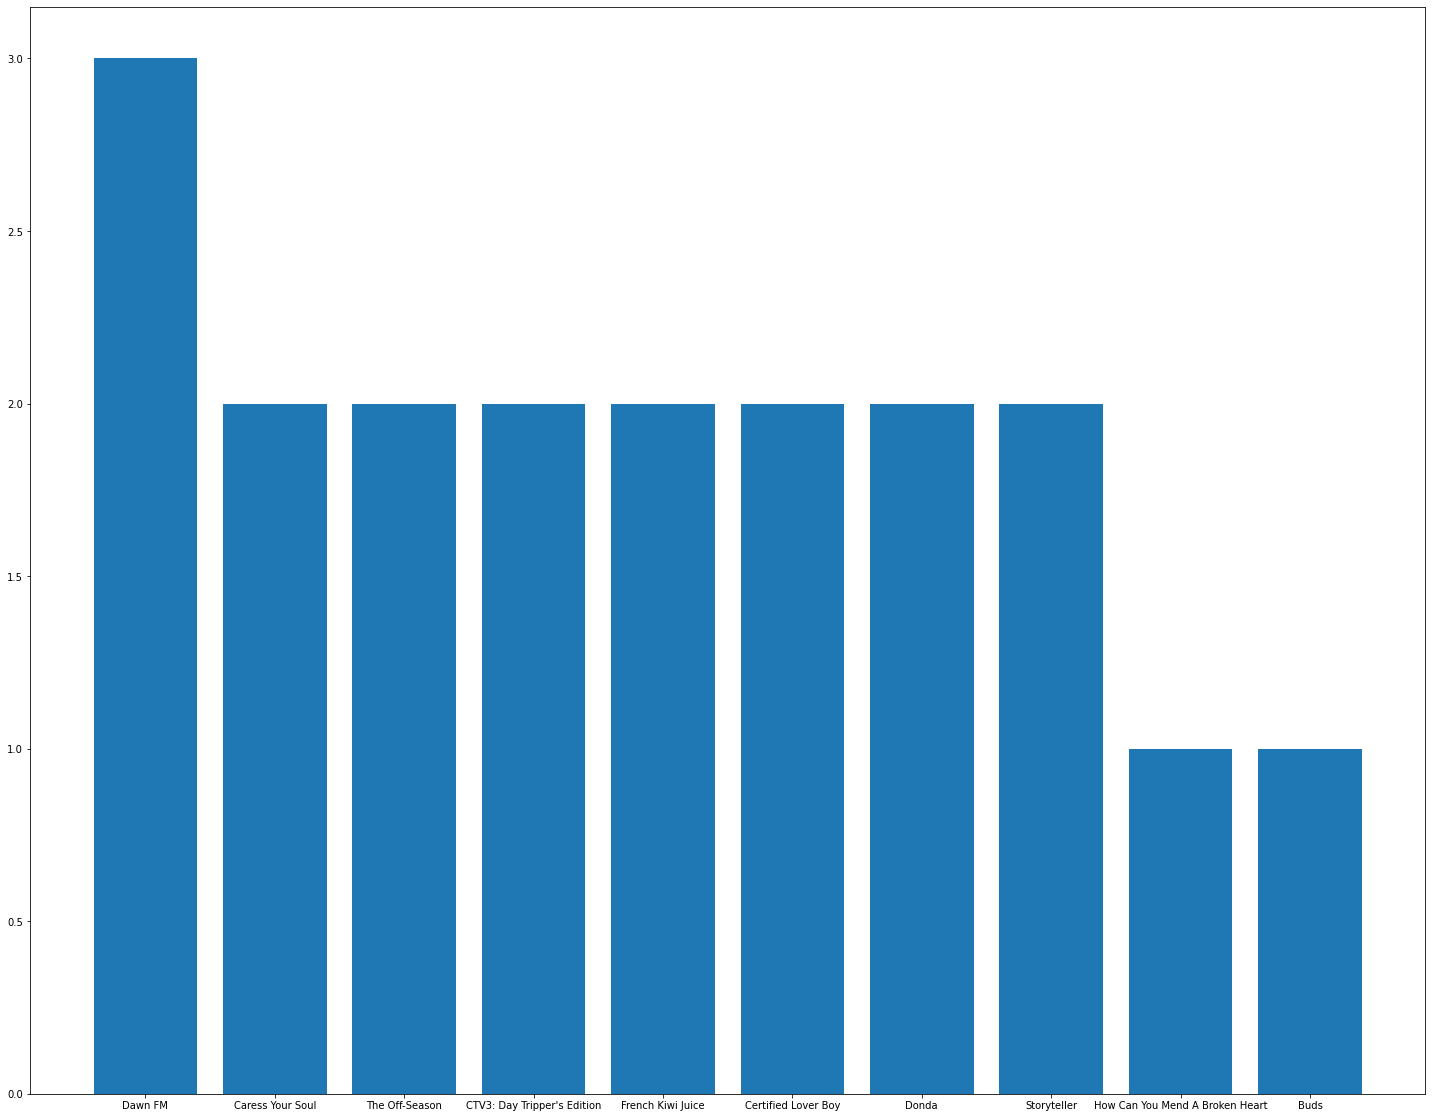

In [ ]:
postionofbars = list(range(len(count_albums)))
plt.figure(figsize=(25, 20))
plt.bar(postionofbars,albums_data)
plt.xticks(postionofbars,count_albums)

# **The Top Artists from the Global Playlist**

In [ ]:
artists_data = top_final_df["artist"].value_counts().head(10)
count_artist = artists_data.index
albums_data = top_final_df["album"].value_counts().head(10)
count_albums = albums_data.index
# here i am thinking to recommend based on the artist and album this playist has and hence checking which is the most heard artist and album here

([<matplotlib.axis.XTick at 0x7f6495009070>,
 [Text(0, 0, 'Michael Bublé'),
  Text(0, 0, 'Bad Bunny'),
  Text(0, 0, 'd4vd'),
  Text(0, 0, 'Tom Odell'),
  Text(0, 0, 'JVKE'),
  Text(0, 0, 'Rema,Selena Gomez'),
  Text(0, 0, 'Central Cee'),
  Text(0, 0, 'Chris Brown'),
  Text(0, 0, 'Eminem'),
  Text(0, 0, 'OneRepublic')])

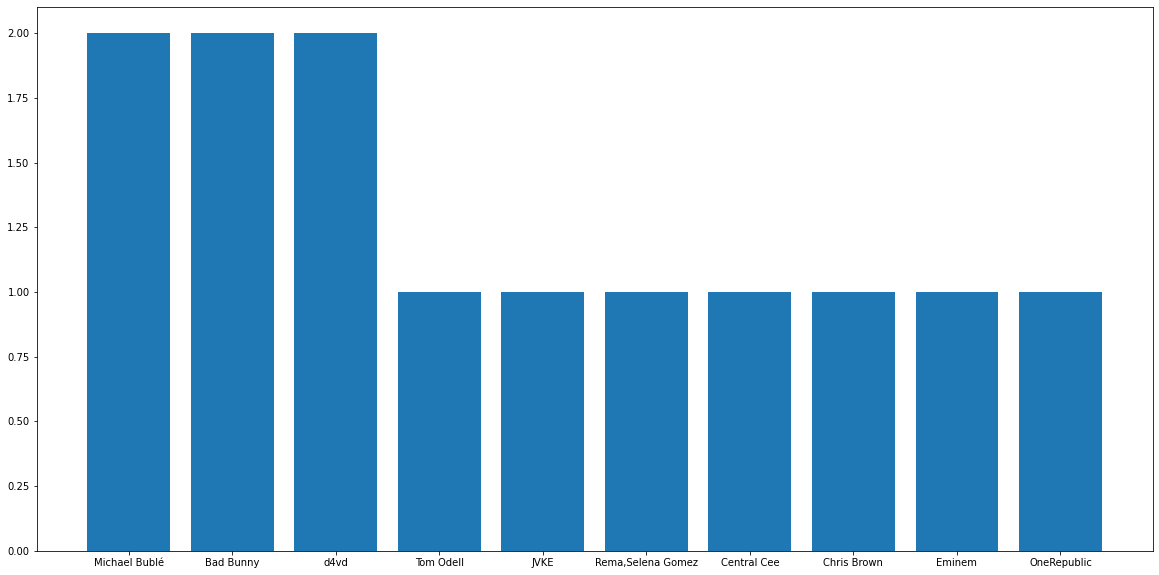

In [ ]:
postionofbars = list(range(len(count_artist)))
plt.figure(figsize=(20, 10))
plt.bar(postionofbars,artists_data)
plt.xticks(postionofbars,count_artist)

([<matplotlib.axis.XTick at 0x7f6494bd1160>,
 [Text(0, 0, 'Un Verano Sin Ti'),
  Text(0, 0, 'SOS'),
  Text(0, 0, 'Long Way Down'),
  Text(0, 0, 'this is what ____ feels like (Vol. 1-4)'),
  Text(0, 0, 'Calm Down (with Selena Gomez)'),
  Text(0, 0, 'LET GO'),
  Text(0, 0, 'Indigo (Extended)'),
  Text(0, 0, 'Encore (Deluxe Version)'),
  Text(0, 0, 'I Ain’t Worried (Music From The Motion Picture "Top Gun: Maverick")'),
  Text(0, 0, 'Ditto')])

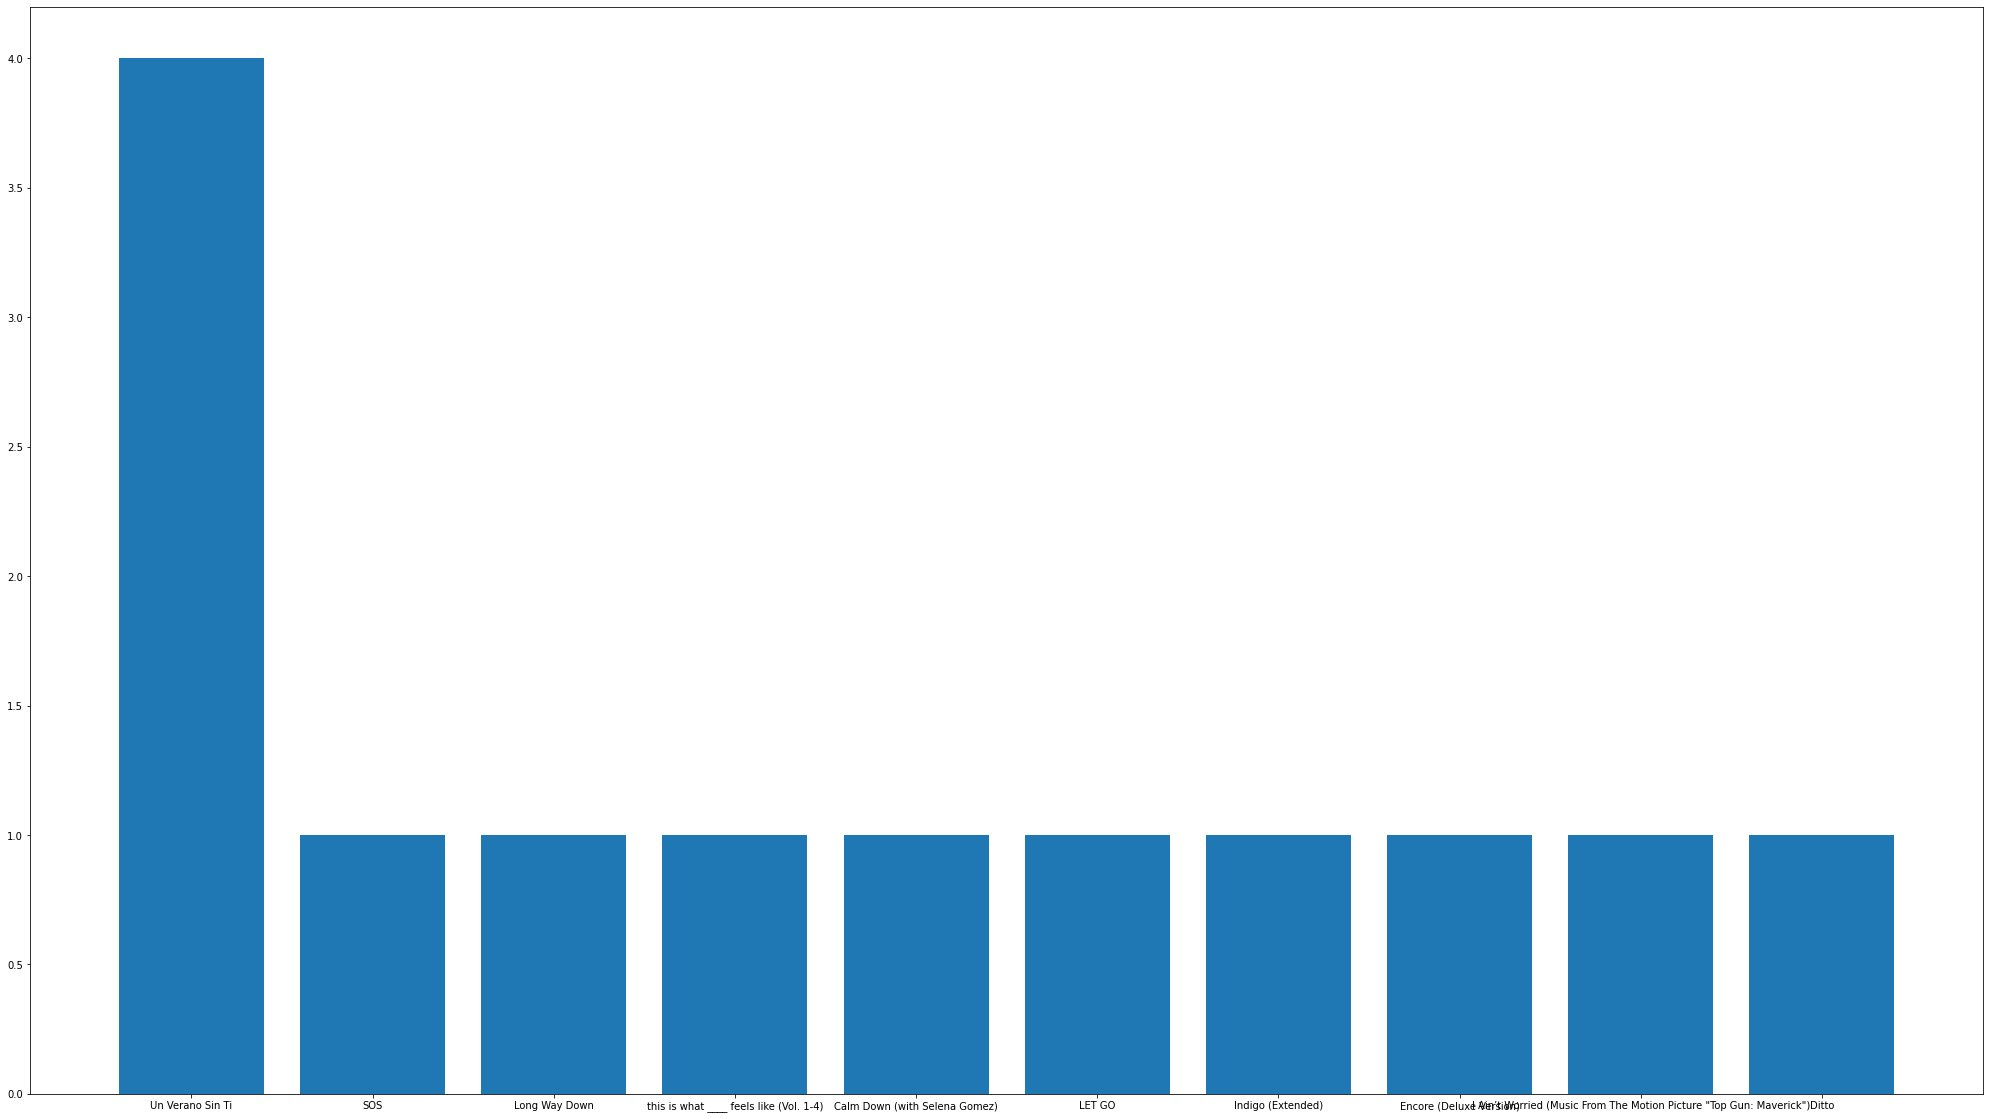

In [ ]:
postionofbars = list(range(len(count_albums)))
plt.figure(figsize=(35, 20))
plt.bar(postionofbars,albums_data)
plt.xticks(postionofbars,count_albums)

In [ ]:
final_music_df  = final_df[['artist','id','name','danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', "popularity"]]

In [ ]:
final_music_df['metadata'] = final_df['artist'] + ' ' +  final_df['album']

<ipython-input-28-edc1003267ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_music_df['metadata'] = final_df['artist'] + ' ' +  final_df['album']


In [ ]:
final_music_df.head()

,artist,id,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,metadata
0,"Loyle Carner,Jordan Rakei",64I9byMYBlS1ARsC3vtpgW,Ottolenghi,0.776,0.593,7,-10.535,1,0.2520,0.3270,0.006160,0.186,0.247,94.970,63,"Loyle Carner,Jordan Rakei Not Waving, But Drow..."
1,"Masego,FKJ",51rPRW8NjxZoWPPjnRGzHw,Tadow,0.704,0.487,9,-6.407,0,0.0604,0.6690,0.000086,0.111,0.313,121.726,73,"Masego,FKJ Lady Lady"
2,Masego,6zWU7YALeEDMcPGhKKZJhV,Navajo,0.567,0.593,6,-7.404,0,0.2880,0.1170,0.000001,0.248,0.358,88.545,67,Masego Navajo
3,"Joe Hertz,Amber-Simone,Cabu",3xy8karhdpkltgdwj9FGbQ,Stay Lost - Cabu Remix,0.572,0.498,2,-10.484,0,0.4310,0.0471,0.000005,0.247,0.549,109.192,26,"Joe Hertz,Amber-Simone,Cabu Stay Lost (Cabu Re..."
4,Two Another,79ZQoLroAAQYHM9sJ1kbGh,Keeping Me Under,0.794,0.549,2,-7.791,1,0.0874,0.1350,0.000108,0.115,0.580,108.015,62,Two Another Keeping Me Under


In [ ]:
# Remove Punctuation Marks
final_music_df['metadata'] = final_music_df['metadata'].str.replace('.',' ')
final_music_df['metadata'] = final_music_df['metadata'].str.replace(',',' ')
final_music_df['metadata'] = final_music_df['metadata'].str.replace('!',' ')
final_music_df['metadata'] = final_music_df['metadata'].str.replace('-',' ')

<ipython-input-30-0810aafd1895>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final_music_df['metadata'] = final_music_df['metadata'].str.replace('.',' ')
<ipython-input-30-0810aafd1895>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_music_df['metadata'] = final_music_df['metadata'].str.replace('.',' ')
<ipython-input-30-0810aafd1895>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [ ]:
# to remove duplicate names from metadata
final_music_df.drop_duplicates(subset ="metadata",keep = False, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
final_music_df.head()

,artist,id,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,metadata
0,"Loyle Carner,Jordan Rakei",64I9byMYBlS1ARsC3vtpgW,Ottolenghi,0.776,0.593,7,-10.535,1,0.2520,0.3270,0.006160,0.186,0.247,94.970,63,Loyle Carner Jordan Rakei Not Waving But Drow...
1,"Masego,FKJ",51rPRW8NjxZoWPPjnRGzHw,Tadow,0.704,0.487,9,-6.407,0,0.0604,0.6690,0.000086,0.111,0.313,121.726,73,Masego FKJ Lady Lady
2,Masego,6zWU7YALeEDMcPGhKKZJhV,Navajo,0.567,0.593,6,-7.404,0,0.2880,0.1170,0.000001,0.248,0.358,88.545,67,Masego Navajo
3,"Joe Hertz,Amber-Simone,Cabu",3xy8karhdpkltgdwj9FGbQ,Stay Lost - Cabu Remix,0.572,0.498,2,-10.484,0,0.4310,0.0471,0.000005,0.247,0.549,109.192,26,Joe Hertz Amber Simone Cabu Stay Lost (Cabu Re...
4,Two Another,79ZQoLroAAQYHM9sJ1kbGh,Keeping Me Under,0.794,0.549,2,-7.791,1,0.0874,0.1350,0.000108,0.115,0.580,108.015,62,Two Another Keeping Me Under


In [ ]:
final_music_df = final_music_df.drop(columns=['artist','name',])

In [ ]:
final_music_df.head()

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,metadata
0,64I9byMYBlS1ARsC3vtpgW,0.776,0.593,7,-10.535,1,0.2520,0.3270,0.006160,0.186,0.247,94.970,63,Loyle Carner Jordan Rakei Not Waving But Drow...
1,51rPRW8NjxZoWPPjnRGzHw,0.704,0.487,9,-6.407,0,0.0604,0.6690,0.000086,0.111,0.313,121.726,73,Masego FKJ Lady Lady
2,6zWU7YALeEDMcPGhKKZJhV,0.567,0.593,6,-7.404,0,0.2880,0.1170,0.000001,0.248,0.358,88.545,67,Masego Navajo
3,3xy8karhdpkltgdwj9FGbQ,0.572,0.498,2,-10.484,0,0.4310,0.0471,0.000005,0.247,0.549,109.192,26,Joe Hertz Amber Simone Cabu Stay Lost (Cabu Re...
4,79ZQoLroAAQYHM9sJ1kbGh,0.794,0.549,2,-7.791,1,0.0874,0.1350,0.000108,0.115,0.580,108.015,62,Two Another Keeping Me Under


In [ ]:
top_final_music_df  = top_final_df[['artist','id','name','danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', "popularity"]]

In [ ]:
top_final_music_df['metadata'] = top_final_df['artist'] + ' ' +  top_final_df['album']

<ipython-input-36-af08ec083a73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_final_music_df['metadata'] = top_final_df['artist'] + ' ' +  top_final_df['album']


In [ ]:
top_final_music_df.head()

,artist,id,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,metadata
0,SZA,1Qrg8KqiBpW07V7PNxwwwL,Kill Bill,0.644,0.735,8,-5.747,1,0.0391,0.0521,0.144000,0.1610,0.418,88.980,86,SZA SOS
1,Mariah Carey,0bYg9bo50gSsH3LtXe2SQn,All I Want for Christmas Is You,0.336,0.627,7,-7.463,1,0.0384,0.1640,0.000000,0.0708,0.350,150.273,100,Mariah Carey Merry Christmas
2,Wham!,2FRnf9qhLbvw8fu4IBXx78,Last Christmas,0.735,0.478,2,-12.472,1,0.0293,0.1890,0.000002,0.3550,0.947,107.682,97,Wham! LAST CHRISTMAS
3,"Sam Smith,Kim Petras",3nqQXoyQOWXiESFLlDF1hG,Unholy (feat. Kim Petras),0.714,0.472,2,-7.375,1,0.0864,0.0130,0.000005,0.2660,0.238,131.121,98,"Sam Smith,Kim Petras Unholy (feat. Kim Petras)"
4,"Metro Boomin,The Weeknd,21 Savage",2dHHgzDwk4BJdRwy9uXhTO,Creepin' (with The Weeknd & 21 Savage),0.715,0.620,1,-6.005,0,0.0484,0.4170,0.000000,0.0822,0.172,97.950,93,"Metro Boomin,The Weeknd,21 Savage HEROES & VIL..."


In [ ]:
# Remove Punctuation Marks
top_final_music_df['metadata'] = top_final_music_df['metadata'].str.replace('.',' ')
top_final_music_df['metadata'] = top_final_music_df['metadata'].str.replace(',',' ')
top_final_music_df['metadata'] = top_final_music_df['metadata'].str.replace('!',' ')
top_final_music_df['metadata'] = top_final_music_df['metadata'].str.replace('-',' ')

<ipython-input-38-f1544419adf1>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top_final_music_df['metadata'] = top_final_music_df['metadata'].str.replace('.',' ')
<ipython-input-38-f1544419adf1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_final_music_df['metadata'] = top_final_music_df['metadata'].str.replace('.',' ')
<ipython-input-38-f1544419adf1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [ ]:
top_final_music_df.head()

,artist,id,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,metadata
0,SZA,1Qrg8KqiBpW07V7PNxwwwL,Kill Bill,0.644,0.735,8,-5.747,1,0.0391,0.0521,0.144000,0.1610,0.418,88.980,86,SZA SOS
1,Mariah Carey,0bYg9bo50gSsH3LtXe2SQn,All I Want for Christmas Is You,0.336,0.627,7,-7.463,1,0.0384,0.1640,0.000000,0.0708,0.350,150.273,100,Mariah Carey Merry Christmas
2,Wham!,2FRnf9qhLbvw8fu4IBXx78,Last Christmas,0.735,0.478,2,-12.472,1,0.0293,0.1890,0.000002,0.3550,0.947,107.682,97,Wham LAST CHRISTMAS
3,"Sam Smith,Kim Petras",3nqQXoyQOWXiESFLlDF1hG,Unholy (feat. Kim Petras),0.714,0.472,2,-7.375,1,0.0864,0.0130,0.000005,0.2660,0.238,131.121,98,Sam Smith Kim Petras Unholy (feat Kim Petras)
4,"Metro Boomin,The Weeknd,21 Savage",2dHHgzDwk4BJdRwy9uXhTO,Creepin' (with The Weeknd & 21 Savage),0.715,0.620,1,-6.005,0,0.0484,0.4170,0.000000,0.0822,0.172,97.950,93,Metro Boomin The Weeknd 21 Savage HEROES & VIL...


In [ ]:
top_final_music_df.shape

(50, 16)

In [ ]:
final_music_df.shape

(91, 14)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(final_music_df['metadata'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=final_music_df.index)
print(tfidf_df.shape)

(91, 303)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
top_tfidf = TfidfVectorizer(stop_words="english")
top_tfidf_matrix = top_tfidf.fit_transform(top_final_music_df['metadata'])
top_tfidf_df = pd.DataFrame(top_tfidf_matrix.toarray(), index=top_final_music_df.index)
print(top_tfidf_df.shape)

(50, 174)


In [ ]:
tfidf_df.loc[0]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
298    0.0
299    0.0
300    0.0
301    0.0
302    0.0
Name: 0, Length: 303, dtype: float64

In [ ]:
top_tfidf_df.loc[0]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
169    0.0
170    0.0
171    0.0
172    0.0
173    0.0
Name: 0, Length: 174, dtype: float64

In [ ]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
svd = TruncatedSVD(n_components=200)
latent_matrix = svd.fit_transform(tfidf_df)

In [ ]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
top_svd = TruncatedSVD(n_components=150)
top_latent_matrix = top_svd.fit_transform(top_tfidf_df)

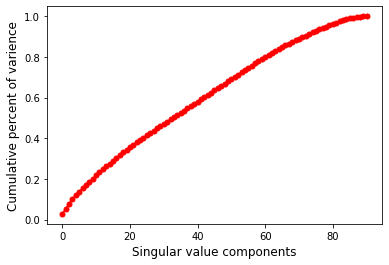

In [ ]:
## for now it is at alomost 0.40 because of time and process related issues but 0.5 variance of the given distribution is recommended
explained  = svd.explained_variance_ratio_.cumsum()
plt.plot(explained,'.-',ms=10,color='red')
plt.xlabel('Singular value components', fontsize=12)
plt.ylabel('Cumulative percent of varience', fontsize=12)
plt.show()

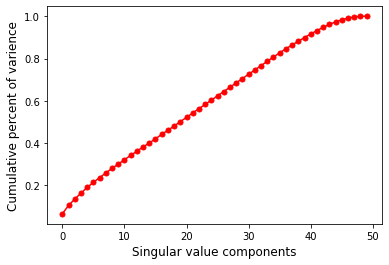

In [ ]:
## for now it is at alomost 0.40 because of time and process related issues but 0.5 variance of the given distribution is recommended
explained  = top_svd.explained_variance_ratio_.cumsum()
plt.plot(explained,'.-',ms=10,color='red')
plt.xlabel('Singular value components', fontsize=12)
plt.ylabel('Cumulative percent of varience', fontsize=12)
plt.show()

In [ ]:
n = 200
latent_matrix_l_df = pd.DataFrame(latent_matrix[:,0:n], index=final_music_df.id.to_list())

In [ ]:
latent_matrix_l_df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
64I9byMYBlS1ARsC3vtpgW,-4.525100e-16,-6.597605e-18,1.706497e-16,1.946587e-17,-1.130220e-16,6.296544e-17,9.719534e-17,-2.314268e-16,-4.901039e-18,-2.299414e-16,...,-5.395981e-17,-1.018291e-17,-4.961379e-17,9.033582e-17,5.476107e-17,-5.452017e-17,1.012307e-16,6.691791e-17,-6.545053e-17,1.734723e-18
51rPRW8NjxZoWPPjnRGzHw,-1.310289e-16,-2.087980e-15,-9.333026e-14,2.960657e-01,5.940239e-16,8.641879e-16,-8.969692e-16,-3.117582e-15,-4.606433e-15,-6.468828e-16,...,-6.475627e-16,7.886995e-16,2.675792e-16,4.700601e-16,7.038864e-18,1.861373e-17,-1.842116e-16,-2.290502e-17,-3.273423e-16,-8.673617e-17
6zWU7YALeEDMcPGhKKZJhV,2.018162e-18,-4.503339e-16,-1.901847e-14,5.991069e-02,6.168549e-16,6.666878e-16,-1.033975e-15,-1.904992e-15,-3.278380e-15,-5.598389e-16,...,1.076362e-16,1.808626e-16,-6.356445e-16,-4.529572e-16,3.375248e-17,1.372524e-17,-2.577354e-16,-3.253175e-16,3.457087e-17,-2.749833e-17
3xy8karhdpkltgdwj9FGbQ,7.320231e-03,-2.561372e-16,-1.637286e-04,-1.322834e-16,-2.702431e-15,1.808366e-02,4.134522e-02,-1.372559e-02,-4.713173e-15,-1.068143e-15,...,-1.110727e-16,-5.098658e-02,-4.205696e-02,-1.581123e-15,7.842444e-05,3.901222e-03,-2.003799e-04,-4.862112e-16,1.115922e-17,0.000000e+00
79ZQoLroAAQYHM9sJ1kbGh,1.023111e-16,1.683450e-16,-7.535952e-17,-2.965858e-16,-2.466508e-16,2.472762e-16,2.739085e-16,-8.318364e-16,1.618997e-16,5.029466e-16,...,1.503772e-17,1.145070e-16,2.471247e-16,1.252235e-16,-6.627684e-17,1.573909e-16,3.053460e-17,-2.593019e-16,3.656676e-16,-5.526853e-17


In [ ]:
n = 150
top_latent_matrix_df = pd.DataFrame(top_latent_matrix[:,0:n], index=top_final_music_df.id.to_list())

In [ ]:
top_latent_matrix_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
1Qrg8KqiBpW07V7PNxwwwL,3.392198e-16,-1.675124e-16,5.933593e-16,-4.954313e-16,-1.634821e-16,-4.609174e-17,2.556074e-17,1.633464e-16,-2.896837e-16,-1.904169e-16,...,1.424014e-17,-1.730477e-16,4.329115e-17,-1.580808e-17,-7.928256e-17,-3.418160e-17,7.174893e-17,5.546049e-17,5.424227e-17,1.006817e-31
0bYg9bo50gSsH3LtXe2SQn,-1.741215e-16,3.835031e-01,-4.199433e-15,-4.056187e-15,-4.948511e-01,-6.372402e-02,-2.947852e-14,1.798936e-15,3.547623e-01,-9.929779e-16,...,1.030643e-01,7.870712e-16,6.564215e-01,-2.523978e-02,-1.899715e-16,-1.545589e-16,-4.940006e-16,1.104990e-16,1.340691e-02,-2.068021e-18
2FRnf9qhLbvw8fu4IBXx78,-2.178375e-16,4.745075e-01,-4.980519e-15,-3.540243e-15,-3.800541e-01,-2.695655e-02,-1.206225e-14,9.813226e-16,5.353614e-02,5.468361e-16,...,4.647827e-01,-3.663169e-15,-3.351530e-01,-2.655077e-01,2.193011e-16,-2.679277e-17,3.045916e-16,4.566700e-16,2.904130e-02,2.465194e-18
3nqQXoyQOWXiESFLlDF1hG,7.852714e-17,-1.430090e-16,2.469255e-16,1.855493e-16,4.032727e-17,8.587867e-16,1.112515e-16,1.100356e-16,2.501592e-16,-1.318922e-14,...,-9.186962e-16,1.426908e-16,2.897618e-16,4.057950e-16,2.500728e-16,-6.516585e-17,1.803029e-16,1.746524e-16,2.952942e-17,-6.293648e-18
2dHHgzDwk4BJdRwy9uXhTO,-1.162289e-16,5.080091e-16,2.157292e-15,8.407056e-01,-7.371137e-15,-8.377827e-16,3.482579e-16,1.002484e-15,-1.511919e-16,-5.885989e-16,...,9.303600e-16,3.988460e-17,-4.527104e-16,1.466026e-15,5.414925e-01,-2.173040e-15,-3.654987e-16,4.601352e-16,7.356393e-17,-1.309355e-17


In [ ]:
top_latent_matrix_df.shape

(50, 50)

In [ ]:
latent_matrix_l_df.shape

(91, 91)

# **Now Working On Making Collaborative Latent Matrix**

In [ ]:
num_des_df.head()

,danceability,loudness,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.729551,0.635369,0.581332,0.414716,0.353484,0.006581,0.192326,0.218226,0.178559,0.276745
1,0.634565,0.859024,0.460078,0.058714,0.723231,0.000092,0.100684,0.291937,0.369354,0.561493
2,0.453826,0.805006,0.581332,0.481605,0.126447,0.000001,0.268084,0.342193,0.132742,0.267342
3,0.460422,0.638132,0.472661,0.747306,0.050876,0.000005,0.266862,0.555506,0.279975,0.356765
4,0.753298,0.784039,0.531000,0.108881,0.145908,0.000115,0.105572,0.590127,0.271582,0.334969


In [ ]:
colab_top_num_des_df.head()

,id,danceability,loudness,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,1Qrg8KqiBpW07V7PNxwwwL,0.644,-5.747,0.735,0.0391,0.0521,0.144000,0.1610,0.418,88.980,2.565783
1,0bYg9bo50gSsH3LtXe2SQn,0.336,-7.463,0.627,0.0384,0.1640,0.000000,0.0708,0.350,150.273,4.018450
2,2FRnf9qhLbvw8fu4IBXx78,0.735,-12.472,0.478,0.0293,0.1890,0.000002,0.3550,0.947,107.682,4.382667
3,3nqQXoyQOWXiESFLlDF1hG,0.714,-7.375,0.472,0.0864,0.0130,0.000005,0.2660,0.238,131.121,2.615717
4,2dHHgzDwk4BJdRwy9uXhTO,0.715,-6.005,0.620,0.0484,0.4170,0.000000,0.0822,0.172,97.950,3.692000


In [ ]:
colab_num_des_df.head()

,id,danceability,loudness,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,64I9byMYBlS1ARsC3vtpgW,0.776,-10.535,0.593,0.2520,0.3270,0.006160,0.186,0.247,94.970,3.293350
1,51rPRW8NjxZoWPPjnRGzHw,0.704,-6.407,0.487,0.0604,0.6690,0.000086,0.111,0.313,121.726,5.031550
2,6zWU7YALeEDMcPGhKKZJhV,0.567,-7.404,0.593,0.2880,0.1170,0.000001,0.248,0.358,88.545,3.235950
3,3xy8karhdpkltgdwj9FGbQ,0.572,-10.484,0.498,0.4310,0.0471,0.000005,0.247,0.549,109.192,3.781817
4,79ZQoLroAAQYHM9sJ1kbGh,0.794,-7.791,0.549,0.0874,0.1350,0.000108,0.115,0.580,108.015,3.648767


# **Making the Latent Matrix For My Playlist Dataset**

In [ ]:

from sklearn.preprocessing import MinMaxScaler
datatypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
normarization = colab_num_des_df.select_dtypes(include=datatypes)
for col in normarization.columns:
    MinMaxScaler(col)

In [ ]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
features = kmeans.fit_predict(normarization)
colab_num_des_df['features'] = features
MinMaxScaler(colab_num_des_df['features'])

<ipython-input-60-b03f5dd0f050>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colab_num_des_df['features'] = features


MinMaxScaler(feature_range=0     1
1     3
2     1
3     7
4     7
     ..
95    3
96    1
97    5
98    6
99    9
Name: features, Length: 100, dtype: int32)

In [ ]:
colab_num_des_df.head()

,id,danceability,loudness,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,features
0,64I9byMYBlS1ARsC3vtpgW,0.776,-10.535,0.593,0.2520,0.3270,0.006160,0.186,0.247,94.970,3.293350,1
1,51rPRW8NjxZoWPPjnRGzHw,0.704,-6.407,0.487,0.0604,0.6690,0.000086,0.111,0.313,121.726,5.031550,3
2,6zWU7YALeEDMcPGhKKZJhV,0.567,-7.404,0.593,0.2880,0.1170,0.000001,0.248,0.358,88.545,3.235950,1
3,3xy8karhdpkltgdwj9FGbQ,0.572,-10.484,0.498,0.4310,0.0471,0.000005,0.247,0.549,109.192,3.781817,7
4,79ZQoLroAAQYHM9sJ1kbGh,0.794,-7.791,0.549,0.0874,0.1350,0.000108,0.115,0.580,108.015,3.648767,7


In [ ]:
aud_features_1 = pd.pivot_table(colab_num_des_df,values="features",index=colab_num_des_df.index,columns="id").fillna(0)
aud_features_1.head()

id,0742PcMPo2Akmo4vHC29VZ,08XWh5c0BMyD1nKVxxl91z,0BFGDkrXAneskCJdudSCro,0Fcq59wK1d3wlsrkdRvbeA,0GAyuCo975IHGxxiLKDufB,0HUTL8i4y4MiGCPId7M7wb,0PgYPBGqF6Wm5KFHQ81nq5,0RbW8kWozrVSIGb4V13o0o,0WSEq9Ko4kFPt8yo3ICd6T,0bOwptN7yALEmvNqdtuw8u,...,76tGvMdmFKuiMew33ZNNA9,79ZQoLroAAQYHM9sJ1kbGh,7CIERzyqIwLVKGp00YbHRO,7i4hAFqaMcw12ITAKtLyQb,7oiwTsa57BFZxXxAnWdxMC,7onHzHeOVE3M9p0tNKQbXc,7qM1BWAsZMTYh4BcYLb0uQ,7sMBvZCSUl99bJLXZaLa0b,7vF5tU5fFowPWbjnMz0EdF,7vgTNTaEz3CsBZ1N4YQalM
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Now Making Latent Matrix for Top 50 Playlist Dataset**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
datatypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
normarization = colab_top_num_des_df.select_dtypes(include=datatypes)
for col in normarization.columns:
    MinMaxScaler(col)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
features = kmeans.fit_predict(normarization)
colab_top_num_des_df['features'] = features
MinMaxScaler(colab_num_des_df['features'])

<ipython-input-64-f45954bd8a63>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colab_top_num_des_df['features'] = features


MinMaxScaler(feature_range=0     1
1     3
2     1
3     7
4     7
     ..
95    3
96    1
97    5
98    6
99    9
Name: features, Length: 100, dtype: int32)

In [ ]:
colab_top_num_des_df.head()

,id,danceability,loudness,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,features
0,1Qrg8KqiBpW07V7PNxwwwL,0.644,-5.747,0.735,0.0391,0.0521,0.144000,0.1610,0.418,88.980,2.565783,7
1,0bYg9bo50gSsH3LtXe2SQn,0.336,-7.463,0.627,0.0384,0.1640,0.000000,0.0708,0.350,150.273,4.018450,1
2,2FRnf9qhLbvw8fu4IBXx78,0.735,-12.472,0.478,0.0293,0.1890,0.000002,0.3550,0.947,107.682,4.382667,6
3,3nqQXoyQOWXiESFLlDF1hG,0.714,-7.375,0.472,0.0864,0.0130,0.000005,0.2660,0.238,131.121,2.615717,8
4,2dHHgzDwk4BJdRwy9uXhTO,0.715,-6.005,0.620,0.0484,0.4170,0.000000,0.0822,0.172,97.950,3.692000,0


In [ ]:
aud_features_2 = pd.pivot_table(colab_top_num_des_df,values="features",index=colab_top_num_des_df.index,columns="id").fillna(0)
aud_features_2.head()

id,0QHEIqNKsMoOY5urbzN48u,0V3wPSX9ygBnCm8psDIegu,0WtM2NBVQNNJLh6scP13H8,0bYg9bo50gSsH3LtXe2SQn,0lizgQ7Qw35od7CYaoMBZb,11BKm0j4eYoCPPpCONAVwA,1IHWl5LamUGEuP4ozKQSXZ,1IcR6RlgvDczfvoWJSSY2A,1Qrg8KqiBpW07V7PNxwwwL,1Y3LN4zO1Edc2EluIoSPJN,...,5odlY52u43F5BjByhxg7wg,5ww2BF9slyYgNOk37BlC4u,6Sq7ltF9Qa7SNFBsV5Cogx,6tjituizSxwSmBB5vtgHZE,73vIOb4Q7YN6HeJTbscRx5,78Sw5GDo6AlGwTwanjXbGh,7fUYUcWy853HS8YJn0b3Sr,7jtQIBanIiJOMS6RyCx6jZ,7uoFMmxln0GPXQ0AcCBXRq,7vQbuQcyTflfCIOu3Uzzya
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
aud_features_1.shape

(100, 100)

In [ ]:
aud_features_2.shape

(50, 50)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

data_1= np.array(latent_matrix_l_df)[1:50,:50]
print(data_1.shape)
data_2 = np.array(top_latent_matrix_df[1:])
print(data_2.shape)
score_1 = cosine_similarity(data_1 , data_2)[:,0]
data_combine = pd.DataFrame(np.concatenate((data_1, data_2)))

dictDF = {"content":score_1}
print(score_1.shape)
similar = pd.DataFrame(dictDF, index = top_latent_matrix_df[1:].index)
similar.sort_values("content",ascending=False,inplace=True)
for i in similar.index:
  print(top_final_df[top_final_df["id"]== i]["name"])

(49, 50)
(49, 50)
(49,)
22    Made You Look
Name: name, dtype: object
20    Me Porto Bonito
Name: name, dtype: object
34    Die For You
Name: name, dtype: object
48    Sleigh Ride
Name: name, dtype: object
17    Gato de Noche
Name: name, dtype: object
4    Creepin' (with The Weeknd & 21 Savage)
Name: name, dtype: object
44    Efecto
Name: name, dtype: object
15    Feliz Navidad
Name: name, dtype: object
14    Santa Tell Me
Name: name, dtype: object
13    Quevedo: Bzrp Music Sessions, Vol. 52
Name: name, dtype: object
18    Snowman
Name: name, dtype: object
19    Rich Flex
Name: name, dtype: object
46    Sweater Weather
Name: name, dtype: object
42    Bad Habit
Name: name, dtype: object
23    Let It Snow! Let It Snow! Let It Snow!
Name: name, dtype: object
10    La Jumpa
Name: name, dtype: object
24    Another Love
Name: name, dtype: object
40    Miss You
Name: name, dtype: object
12    It's Beginning to Look a Lot like Christmas
Name: name, dtype: object
31    I Ain't Worried
Name: nam

In [ ]:
aud_1_colab = np.array(colab_num_des_df["features"][:50]).reshape(-1,1)
aud_2_colab =  np.array(colab_top_num_des_df["features"][:50]).reshape(-1,1)
score_1 = cosine_similarity(aud_1_colab , aud_2_colab)[:,0]
dictDF = {"colab":score_1}
print(score_1.shape)
similar = pd.DataFrame(dictDF, index = colab_top_num_des_df.index)
similar.sort_values("colab",ascending=False,inplace=True)
pred_ids = similar[1:].head(11).index
print(pred_ids)
for i in pred_ids:
  pred_track_data = colab_top_num_des_df.loc[i]
  pred_track_id = pred_track_data["id"]
  print(top_final_df[top_final_df["id"] == pred_track_id]["name"])
  print(print(top_final_df[top_final_df["id"] == pred_track_id]["track_href"])
  )



(50,)
Int64Index([24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36], dtype='int64')
24    Another Love
Name: name, dtype: object
24    https://api.spotify.com/v1/tracks/7jtQIBanIiJO...
Name: track_href, dtype: object
None
26    golden hour
Name: name, dtype: object
26    https://api.spotify.com/v1/tracks/5odlY52u43F5...
Name: track_href, dtype: object
None
27    Calm Down (with Selena Gomez)
Name: name, dtype: object
27    https://api.spotify.com/v1/tracks/0WtM2NBVQNNJ...
Name: track_href, dtype: object
None
28    LET GO
Name: name, dtype: object
28    https://api.spotify.com/v1/tracks/3zkyus0njMCL...
Name: track_href, dtype: object
None
29    Under The Influence
Name: name, dtype: object
29    https://api.spotify.com/v1/tracks/5IgjP7X4th6n...
Name: track_href, dtype: object
None
30    Mockingbird
Name: name, dtype: object
30    https://api.spotify.com/v1/tracks/561jH07mF1jH...
Name: track_href, dtype: object
None
31    I Ain't Worried
Name: name, dtype: object
31    https://api.spotify.com/

In [ ]:
final_music_df.head()

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,metadata
0,64I9byMYBlS1ARsC3vtpgW,0.776,0.593,7,-10.535,1,0.2520,0.3270,0.006160,0.186,0.247,94.970,64,Loyle Carner Jordan Rakei Not Waving But Drow...
1,51rPRW8NjxZoWPPjnRGzHw,0.704,0.487,9,-6.407,0,0.0604,0.6690,0.000086,0.111,0.313,121.726,75,Masego FKJ Lady Lady
2,6zWU7YALeEDMcPGhKKZJhV,0.567,0.593,6,-7.404,0,0.2880,0.1170,0.000001,0.248,0.358,88.545,68,Masego Navajo
3,3xy8karhdpkltgdwj9FGbQ,0.572,0.498,2,-10.484,0,0.4310,0.0471,0.000005,0.247,0.549,109.192,30,Joe Hertz Amber Simone Cabu Stay Lost (Cabu Re...
4,79ZQoLroAAQYHM9sJ1kbGh,0.794,0.549,2,-7.791,1,0.0874,0.1350,0.000108,0.115,0.580,108.015,63,Two Another Keeping Me Under
